


### Задача:
Рассмотрим функцию $  f(x) = 3x^2 + 2x + 1 $ на интервале $[1, 4]$.
Вычислите определённый интеграл функции $ f(x) $ на заданном интервале




In [1]:
import scipy.integrate as integrate

def f(x):
    return 3*x**2 + 2*x + 1

integrate.quad(f, 1, 4)

(80.99999999999999, 8.992806499463766e-13)

### Задача:
Найдите градиент функции $x^2+y^2$ в точке $(1,2)$

In [2]:
import numpy as np
from scipy.optimize import approx_fprime

def func(x):
    # Пример функции: f(x, y) = x^2 + y^2
    return x[0]**2 + x[1]**2

# Точка, в которой мы хотим найти градиент
x = np.array([1.0, 2.0])

grad = approx_fprime(x, func)

print("Градиент функции в точке", x, ":", grad)

Градиент функции в точке [1. 2.] : [2. 4.]



### Задача:
Градиентный спуск — это итерационный метод оптимизации, который используется для поиска локального минимума дифференцируемой функции. Идея метода заключается в том, чтобы на каждом шаге двигаться в направлении наискорейшего убывания функции, которое определяется отрицательным градиентом функции в текущей точке.

В математической записи, алгоритм градиентного спуска можно представить следующим образом. Пусть $ f: \mathbb{R}^n \rightarrow \mathbb{R} $ — функция, которую мы хотим минимизировать. На каждом шаге $ k $ мы обновляем вектор параметров $ \mathbf{x} $ следующим образом:

$
\mathbf{x}_{k+1} = \mathbf{x}_k - \alpha \nabla f(\mathbf{x}_k),
$

где:
- $ \mathbf{x}_k $ — вектор параметров на шаге \( k \),
- $ \alpha $ — положительное число, называемое скоростью обучения,
- $ \nabla f(\mathbf{x}_k) $ — градиент функции $ f $ в точке $ \mathbf{x}_k $.

Скорость обучения $ \alpha $ контролирует размер шага, с которым алгоритм движется в направлении отрицательного градиента. Правильный выбор скорости обучения критически важен для сходимости алгоритма градиентного спуска к локальному минимуму.

Этот процесс повторяется до тех пор, пока изменения в векторе параметров $ \mathbf{x} $ или значение функции $ f $ не станут достаточно малыми, или пока не будет достигнуто максимальное количество итераций.

Напишите функцию, которая по коэф. $a, b, c$ и начальной точке $x$ возвращает точку минимума у параболы

In [3]:
from scipy.misc import derivative
import random
import numpy as np
import matplotlib.pyplot as plt
def gradient_descent(a, b, c):
    a = 0.5
    def f(x):
        return a*x**2 + b*x+c
    x = np.random.uniform(low = -10.0, high = 10.0)
    x_s = list()
    x_s.append(x)
    eps = 0.000001
    while abs(a*derivative(f, x)) > eps:
        x = x - a*derivative(f, x)
        x_s.append(x)
    return x_s  # возвращаем минимальное значение x

[6.81364642e+00 3.40682321e+00 1.70341160e+00 8.51705802e-01
 4.25852901e-01 2.12926450e-01 1.06463225e-01 5.32316126e-02
 2.66158063e-02 1.33079032e-02 6.65395158e-03 3.32697579e-03
 1.66348789e-03 8.31743947e-04 4.15871974e-04 2.07935987e-04
 1.03967993e-04 5.19839967e-05 2.59919984e-05 1.29959992e-05
 6.49799959e-06 3.24899979e-06 1.62449990e-06]


/tmp/ipykernel_25236/330169263.py:13: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  while abs(a*derivative(f, x)) > eps:
/tmp/ipykernel_25236/330169263.py:14: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  x = x - a*derivative(f, x)


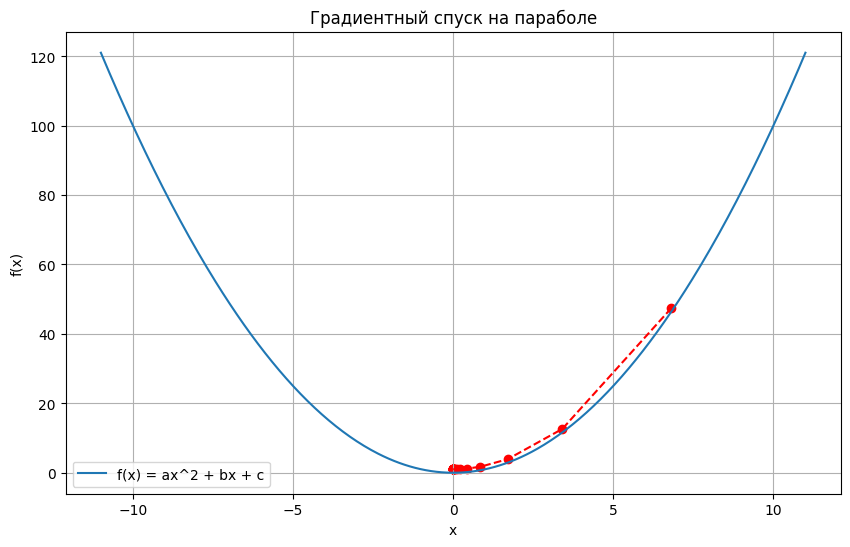

In [4]:
a, b, c = 1, 0, 0
history = np.array(gradient_descent(a, b, c))
history_y = a*np.square(history) + b*history + np.ones(history.shape)
print(history)
# визуализация
initial_x = 10
x = np.linspace(-initial_x - 1, initial_x + 1, 400)
y = a*x**2 + b*x + c
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='f(x) = ax^2 + bx + c')
plt.scatter(history, history_y, color='red')
plt.plot(history, history_y, color='red', linestyle='--')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Градиентный спуск на параболе')
plt.grid(True)
plt.show()


### Задача:
Используйте функцию minimize из библиотеки SciPy для поиска минимума функции Розенброка и Химмельблау

In [5]:
from scipy.optimize import minimize

# Функция Розенброка
def rosenbrock(x):
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

# Нахождение минимума функции Розенброка
result_rosenbrock = minimize(rosenbrock, x0=[0, 0], method='Nelder-Mead')

# Вывод результата
print("Минимум функции Розенброка:")
print("Найденное значение переменных:", result_rosenbrock.x)
print("Значение функции в найденной точке:", result_rosenbrock.fun)
print()

# Функция Химмельблау
def himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

# Нахождение минимума функции Химмельблау
result_himmelblau = minimize(himmelblau, x0=[0, 0], method='Nelder-Mead')

# Вывод результата
print("Минимум функции Химмельблау:")
print("Найденное значение переменных:", result_himmelblau.x)
print("Значение функции в найденной точке:", result_himmelblau.fun)

Минимум функции Розенброка:
Найденное значение переменных: [1.00000439 1.00001064]
Значение функции в найденной точке: 3.6861769151759075e-10

Минимум функции Химмельблау:
Найденное значение переменных: [3.00000632 1.99996853]
Значение функции в найденной точке: 1.4333178246209053e-08
